In [80]:
from functions import *
from Bio import AlignIO
import matplotlib.pyplot as plt

alp=list("ACDEFGHIKLMNPQRSTVWY")

In [2]:
charge = {
    'positive' : set(('R','H', 'K')),
    'negative' : set(('D', 'E')),
    'neutral'  : set(('A', 'N', 'C', 'Q', 'G', 'I', 'L', 'M', 
                     'F', 'P', 'S', 'T', 'W', 'Y', 'U'))
    }

polarity = {
    'polar'  : set(('R', 'N', 'D', 'C', 'Q', 'E', 
                   'G', 'H', 'K', 'S', 'T', 'Y')),
    'apolar' : set(('A', 'I', 'L', 'M',
                  'F', 'F', 'W', 'V'))
}

polarityVolume = {
    'special'      : set('C',),
    'neutralSmall' : set(('A', 'G', 'P', 'S', 'T')),
    'polarSmall'   : set(('N', 'D', 'Q', 'E')),
    'polarLarge'   : set(('R', 'H', 'K')),
    'apolarSmall'  : set(('I', 'L', 'M', 'V')),
    'apolarLarge'  : set(('F', 'W', 'Y'))
}

In [43]:
aa_charact = {}
for i in alp:
    for k in charge:
        if i in charge[k]:
            c = k
    for k in polarity:
        if i in polarity[k]:
            p = k
    for k in polarityVolume:
        if i in polarityVolume[k]:
            v = k
    aa_charact[i] = (c, p, k)

In [44]:
aa_charact

{'A': ('neutral', 'apolar', 'apolarLarge'),
 'C': ('neutral', 'polar', 'apolarLarge'),
 'D': ('negative', 'polar', 'apolarLarge'),
 'E': ('negative', 'polar', 'apolarLarge'),
 'F': ('neutral', 'apolar', 'apolarLarge'),
 'G': ('neutral', 'polar', 'apolarLarge'),
 'H': ('positive', 'polar', 'apolarLarge'),
 'I': ('neutral', 'apolar', 'apolarLarge'),
 'K': ('positive', 'polar', 'apolarLarge'),
 'L': ('neutral', 'apolar', 'apolarLarge'),
 'M': ('neutral', 'apolar', 'apolarLarge'),
 'N': ('neutral', 'polar', 'apolarLarge'),
 'P': ('neutral', 'polar', 'apolarLarge'),
 'Q': ('neutral', 'polar', 'apolarLarge'),
 'R': ('positive', 'polar', 'apolarLarge'),
 'S': ('neutral', 'polar', 'apolarLarge'),
 'T': ('neutral', 'polar', 'apolarLarge'),
 'V': ('neutral', 'apolar', 'apolarLarge'),
 'W': ('neutral', 'apolar', 'apolarLarge'),
 'Y': ('neutral', 'polar', 'apolarLarge')}

In [5]:
query = 'B3GWA1'

In [6]:
alig = readAlig('alignOurs.fa', 'fasta')

In [7]:
lSeq = len(alig[query])
nSeq = len(alig)

In [15]:
 # this is the AA alphabet
alp
listSubs = []
for i in range(len(alp)):
    for j in range(i, len(alp)):
        listSubs.append((alp[i], alp[j]))

listSubs = tuple(listSubs)

In [23]:
subsDic = {}
for x in range(lSeq):
    subsDic[x]= {}
    for y in listSubs:
        subsDic[x][y] = 0

In [36]:
subsDic[0];

In [28]:
sequences = tuple(alig[i] for i in alig)

In [33]:
for x in range(lSeq):
    for y in range(nSeq):
        for z in range(y+1, nSeq):
            aa1 = sequences[y][x]
            aa2 = sequences[z][x]
            if aa1 == '-' or aa2 == '-': continue
            sub = (min(aa1,aa2), max(aa1,aa2))
            subsDic[x][sub] += 1

In [1]:
subsDic[60];

NameError: name 'subsDic' is not defined

In [55]:
conservative = set()
for aa1 in polarity['polar']:
    for aa2 in polarity['polar']:
        subs = (min(aa1,aa2), max(aa1,aa2))
        conservative.add(subs)

for aa3 in polarity['apolar']:
    for aa4 in polarity['apolar']:
        subs1 = (min(aa3,aa4), max(aa3,aa4))
        conservative.add(subs1)
        
radical = set()
for aa5 in polarity['polar']:
    for aa6 in polarity['apolar']:
        subs2 = (min(aa5,aa2), max(aa1,aa6))
        radical.add(subs2)

In [75]:
consRad = {} 
for p in range(lSeq):
    consRad[p] = [0, 0]
    for s in listSubs:
        if s in conservative:
            consRad[p][0] += subsDic[p][s]
        else: # if s in radical
            consRad[p][1] += subsDic[p][s]

In [76]:
consRad[6]

[1056, 597]

Text(0,0.5,'Conservative')

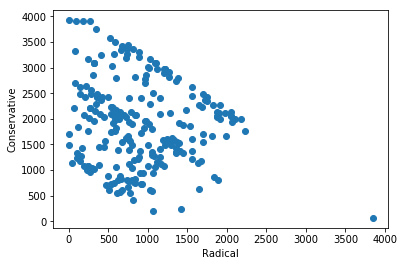

In [81]:
# X = Number of radical
x = list(consRad[i][1] for i in range(lSeq))
# Y = Number of conservative
y = list(consRad[i][0] for i in range(lSeq))

plt.scatter(x, y)
plt.xlabel('Radical')
plt.ylabel('Conservative')

In [84]:
ratio = []

for x in range(lSeq):
    if consRad[x][1] == 0:
        r = 0
    else: 
        r = consRad[x][0]/consRad[x][1]   
    ratio.append(r)

In [87]:
mean = sum(ratio)/ len(ratio)
print(mean)

3.9224990002357942


In [88]:
norm = []
for x in ratio:
    y = (x - mean)/mean
    norm.append(y)

In [90]:
norm1 = list(((x-mean)/mean) for x in ratio)

In [91]:
norm == norm1

True

In [93]:
conservative = set()
for at in polarityVolume:
    for aa1 in polarityVolume[at]:
        for aa2 in polarityVolume[at]:
            subs = (min(aa1,aa2), max(aa1,aa2))
            conservative.add(subs)
setSubs = set(listSubs)
radical = setSubs.difference(conservative)

In [96]:
radical;

In [97]:
conservative;